# **LakeBeD-US Benchmark: High Frequency and Low Frequency Data Harmonization**

## **Setup**

In [14]:
# IMPORT PACKAGES
import os
import pandas as pd
import seaborn as sns

In [2]:
# SET WORKING DIRECTORY
os.chdir("/projects/ml4science/LakeBeD-US/LakeBeD-US-CSE-Benchmark/Data/2-Data-Harmonization")

## **Data Ingestion: `ME_LF_Cleaned.parquet`**

In [4]:
me_lf = pd.read_parquet("../1-Data-Wrangling/ME_LF_Cleaned.parquet")
me_lf

,datetime,do,doc,drp,nh4,no3no2,par,temp,tn,tp
0,1995-05-09 12:00:00+00:00,13.1,NaN,NaN,NaN,NaN,NaN,7.8,NaN,NaN
1,1995-05-10 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1995-05-11 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1995-05-12 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1995-05-13 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
10034,2022-10-28 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10035,2022-10-29 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10036,2022-10-30 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10037,2022-10-31 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's take a look at the percentage of missing values for each variable.

In [5]:
(me_lf.isna().sum() / len(me_lf)) * 100

datetime     0.000000
do          95.637016
doc         99.920311
drp         99.940233
nh4         99.930272
no3no2      99.940233
par         99.551748
temp        95.617093
tn          99.990039
tp          99.930272
dtype: float64

These two variables have a uniform spread of observations from 1995 to 2023 
while the other variables are extremely sparse. We will harmonize only the 
`do` and `temp` observations that overlap with the time range of the high 
frequency data.

In [6]:
me_lf = me_lf.drop(["doc", "drp", "nh4", "no3no2", "par", "tn", "tp"], axis = 1)
me_lf

,datetime,do,temp
0,1995-05-09 12:00:00+00:00,13.1,7.8
1,1995-05-10 12:00:00+00:00,NaN,NaN
2,1995-05-11 12:00:00+00:00,NaN,NaN
3,1995-05-12 12:00:00+00:00,NaN,NaN
4,1995-05-13 12:00:00+00:00,NaN,NaN
...,...,...,...
10034,2022-10-28 12:00:00+00:00,NaN,NaN
10035,2022-10-29 12:00:00+00:00,NaN,NaN
10036,2022-10-30 12:00:00+00:00,NaN,NaN
10037,2022-10-31 12:00:00+00:00,NaN,NaN


## **Data Ingestion: `ME_HF_Cleaned.parquet`**

In [7]:
me_hf = pd.read_parquet("../1-Data-Wrangling/ME_HF_Cleaned.parquet")
me_hf

,datetime,chla_rfu,do,fdom,par,phyco,temp
0,2006-06-28 02:31:00+00:00,NaN,NaN,NaN,NaN,NaN,22.28
1,2006-06-28 02:32:00+00:00,NaN,NaN,NaN,NaN,NaN,22.28
2,2006-06-28 02:33:00+00:00,NaN,NaN,NaN,NaN,NaN,22.29
3,2006-06-28 02:34:00+00:00,NaN,NaN,NaN,NaN,NaN,22.28
4,2006-06-28 02:35:00+00:00,NaN,NaN,NaN,NaN,NaN,22.28
...,...,...,...,...,...,...,...
9457310,2023-11-19 15:22:00+00:00,1.38,10.03,7.26,198.3,0.46,9.04
9457311,2023-11-19 15:23:00+00:00,1.61,10.05,7.25,198.3,0.48,9.04
9457312,2023-11-19 15:24:00+00:00,1.61,10.05,7.25,244.4,0.48,9.04
9457313,2023-11-19 15:25:00+00:00,1.86,10.07,7.25,222.2,0.50,9.04


In [8]:
(me_hf.isna().sum() / len(me_hf)) * 100

datetime     0.000000
chla_rfu    51.272671
do          57.971591
fdom        84.077341
par         74.671659
phyco       51.844683
temp        50.235061
dtype: float64

## **Merging**

In [9]:
mendota = me_hf.merge(me_lf, on = ["datetime", "do", "temp"], how = "outer")
mendota

,datetime,chla_rfu,do,fdom,par,phyco,temp
0,1995-05-09 12:00:00+00:00,NaN,13.10,NaN,NaN,NaN,7.80
1,1995-05-10 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2,1995-05-11 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
3,1995-05-12 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
4,1995-05-13 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
9464302,2023-11-19 15:22:00+00:00,1.38,10.03,7.26,198.3,0.46,9.04
9464303,2023-11-19 15:23:00+00:00,1.61,10.05,7.25,198.3,0.48,9.04
9464304,2023-11-19 15:24:00+00:00,1.61,10.05,7.25,244.4,0.48,9.04
9464305,2023-11-19 15:25:00+00:00,1.86,10.07,7.25,222.2,0.50,9.04


In [10]:
(mendota.isna().sum() / len(mendota)) * 100

datetime     0.000000
chla_rfu    51.308670
do          57.998013
fdom        84.089104
par         74.690371
phyco       51.880259
temp        50.267178
dtype: float64

In [11]:
hf_start_date = me_hf["datetime"].min()
hf_end_date = me_hf["datetime"].max()
hf_date_range = pd.date_range(hf_start_date, hf_end_date, freq = "min")
mendota = mendota[mendota["datetime"].isin(hf_date_range)]
mendota

,datetime,chla_rfu,do,fdom,par,phyco,temp
4068,2006-06-28 02:31:00+00:00,NaN,NaN,NaN,NaN,NaN,22.28
4069,2006-06-28 02:32:00+00:00,NaN,NaN,NaN,NaN,NaN,22.28
4070,2006-06-28 02:33:00+00:00,NaN,NaN,NaN,NaN,NaN,22.29
4071,2006-06-28 02:34:00+00:00,NaN,NaN,NaN,NaN,NaN,22.28
4072,2006-06-28 02:35:00+00:00,NaN,NaN,NaN,NaN,NaN,22.28
...,...,...,...,...,...,...,...
9464302,2023-11-19 15:22:00+00:00,1.38,10.03,7.26,198.3,0.46,9.04
9464303,2023-11-19 15:23:00+00:00,1.61,10.05,7.25,198.3,0.48,9.04
9464304,2023-11-19 15:24:00+00:00,1.61,10.05,7.25,244.4,0.48,9.04
9464305,2023-11-19 15:25:00+00:00,1.86,10.07,7.25,222.2,0.50,9.04


In [12]:
mendota["datetime"] = mendota["datetime"].dt.date
mendota = mendota.groupby("datetime").median().reset_index()
mendota

/localscratch/ipykernel_3752/3024659370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mendota["datetime"] = mendota["datetime"].dt.date


,datetime,chla_rfu,do,fdom,par,phyco,temp
0,2006-06-28,NaN,NaN,NaN,NaN,NaN,22.22
1,2006-06-29,NaN,NaN,NaN,NaN,NaN,22.34
2,2006-06-30,NaN,NaN,NaN,NaN,NaN,22.84
3,2006-07-01,NaN,NaN,NaN,NaN,NaN,22.40
4,2006-07-02,NaN,NaN,NaN,NaN,NaN,22.40
...,...,...,...,...,...,...,...
6349,2023-11-15,1.21,9.23,6.38,0.0,0.42,9.33
6350,2023-11-16,1.52,9.51,7.30,0.0,0.46,9.36
6351,2023-11-17,1.51,9.50,7.32,0.0,0.45,9.32
6352,2023-11-18,1.67,9.58,7.32,0.0,0.46,9.15


In [13]:
(mendota.isna().sum() / len(mendota)) * 100

datetime     0.000000
chla_rfu    46.852376
do          50.283286
fdom        83.018571
par         73.024866
phyco       48.504879
temp        41.847655
dtype: float64

<Axes: xlabel='datetime', ylabel='chla_rfu'>

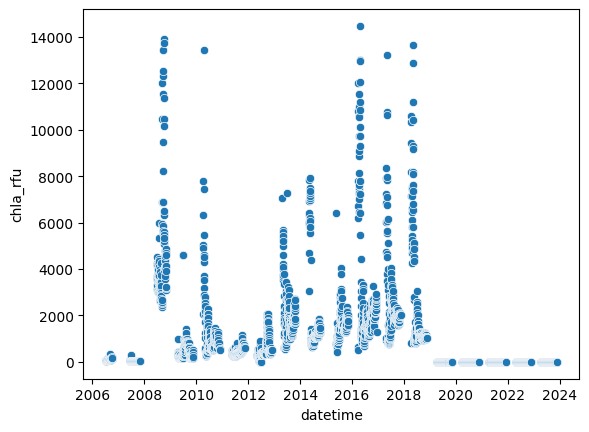

In [18]:
sns.scatterplot(mendota, x = "datetime", y = "chla_rfu")

<Axes: xlabel='datetime', ylabel='do'>

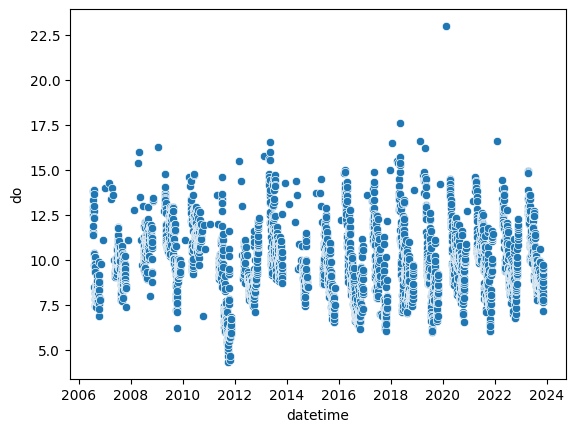

In [19]:
sns.scatterplot(mendota, x = "datetime", y = "do")

<Axes: xlabel='datetime', ylabel='fdom'>

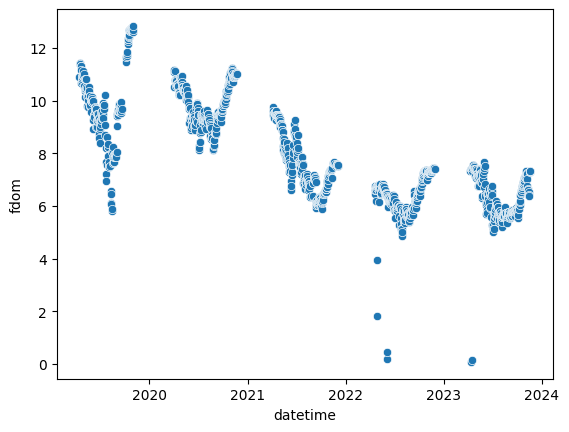

In [20]:
sns.scatterplot(mendota, x = "datetime", y = "fdom")

<Axes: xlabel='datetime', ylabel='par'>

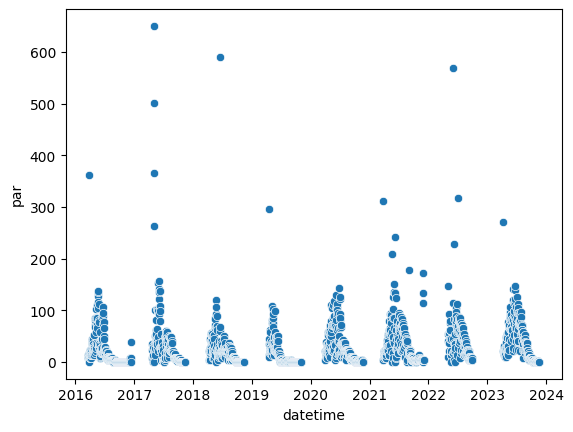

In [21]:
sns.scatterplot(mendota, x = "datetime", y = "par")

<Axes: xlabel='datetime', ylabel='phyco'>

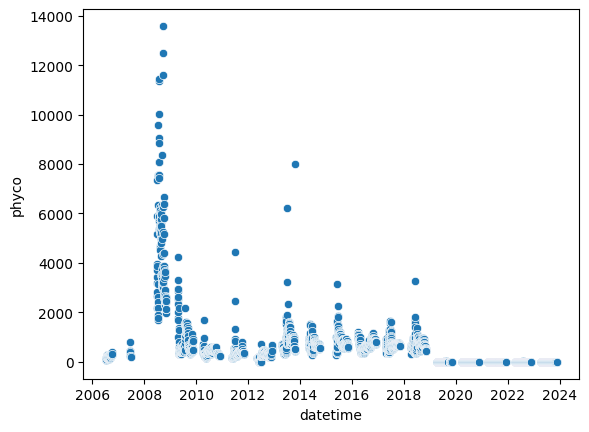

In [22]:
sns.scatterplot(mendota, x = "datetime", y = "phyco")

<Axes: xlabel='datetime', ylabel='temp'>

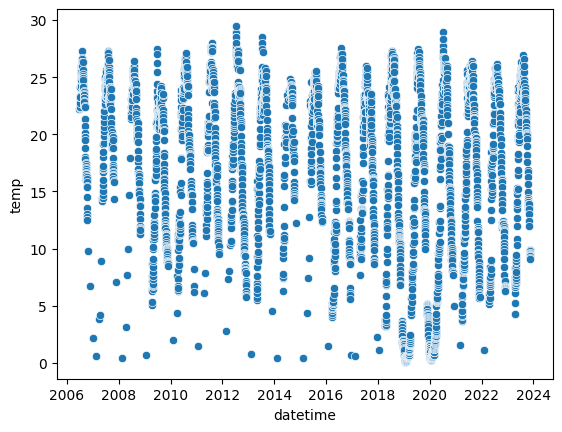

In [23]:
sns.scatterplot(mendota, x = "datetime", y = "temp")

Since `fdom` only contains observations in the last four years, it is possible 
that there will not be enough data in the training split for the imputation 
to reasonably reconstruct the time series. We will omit `fdom`.

In [24]:
mendota = mendota.drop("fdom", axis = 1)
mendota

,datetime,chla_rfu,do,par,phyco,temp
0,2006-06-28,NaN,NaN,NaN,NaN,22.22
1,2006-06-29,NaN,NaN,NaN,NaN,22.34
2,2006-06-30,NaN,NaN,NaN,NaN,22.84
3,2006-07-01,NaN,NaN,NaN,NaN,22.40
4,2006-07-02,NaN,NaN,NaN,NaN,22.40
...,...,...,...,...,...,...
6349,2023-11-15,1.21,9.23,0.0,0.42,9.33
6350,2023-11-16,1.52,9.51,0.0,0.46,9.36
6351,2023-11-17,1.51,9.50,0.0,0.45,9.32
6352,2023-11-18,1.67,9.58,0.0,0.46,9.15


In [25]:
mendota.to_csv("./Mendota_2006_2023.csv", index = False)